In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [18]:
data = pd.read_csv(r"C:/Users/Piyush/Desktop/R Paper/dataset.csv")
data.shape
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])
print(data)

            total gallons
months                   
2012-01-01     1729505300
2012-02-01     1512256300
2012-03-01     1648251343
2012-04-01     1766880389
2012-05-01     2212475768
...                   ...
2018-05-01     1962447300
2018-06-01     2356891100
2018-07-01     2324606100
2018-08-01     2711919000
2018-09-01     2444827200

[81 rows x 1 columns]


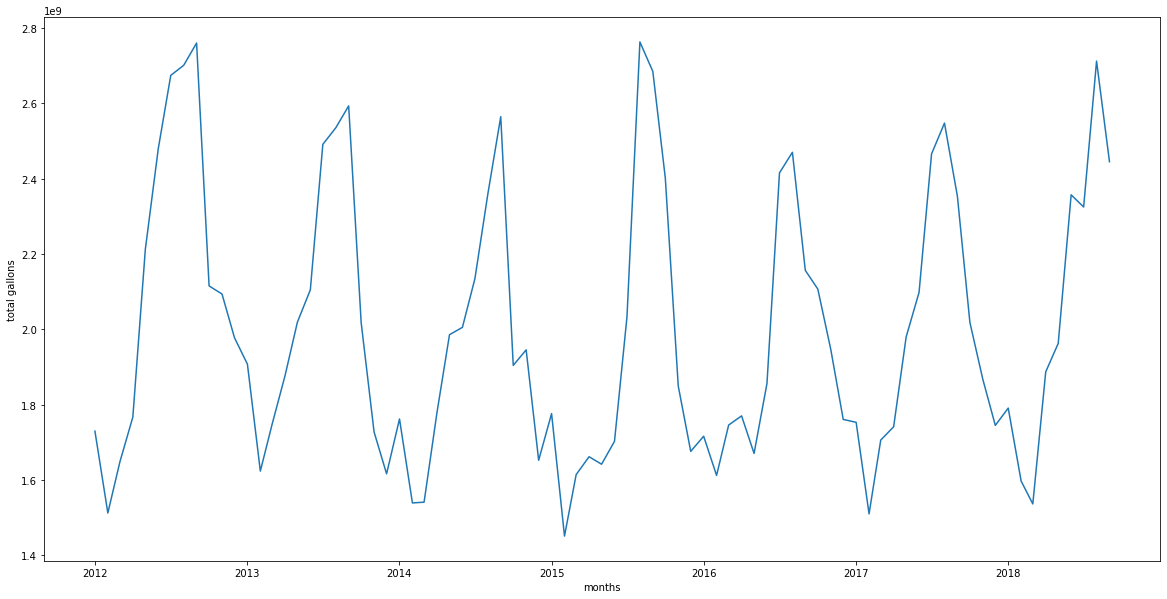

In [19]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("months")
plt.ylabel("total gallons")
plt.plot(data)

In [20]:
# Determining Rolling Statistics
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmeean)
print(rolstd)

            total gallons
months                   
2012-01-01            NaN
2012-02-01            NaN
2012-03-01            NaN
2012-04-01            NaN
2012-05-01            NaN
2012-06-01            NaN
2012-07-01            NaN
2012-08-01            NaN
2012-09-01            NaN
2012-10-01            NaN
2012-11-01            NaN
2012-12-01   2.139087e+09
2013-01-01   2.153899e+09
2013-02-01   2.163164e+09
2013-03-01   2.171367e+09
            total gallons
months                   
2012-01-01            NaN
2012-02-01            NaN
2012-03-01            NaN
2012-04-01            NaN
2012-05-01            NaN
2012-06-01            NaN
2012-07-01            NaN
2012-08-01            NaN
2012-09-01            NaN
2012-10-01            NaN
2012-11-01            NaN
2012-12-01   4.345145e+08
2013-01-01   4.221365e+08
2013-02-01   4.077486e+08
2013-03-01   3.973039e+08


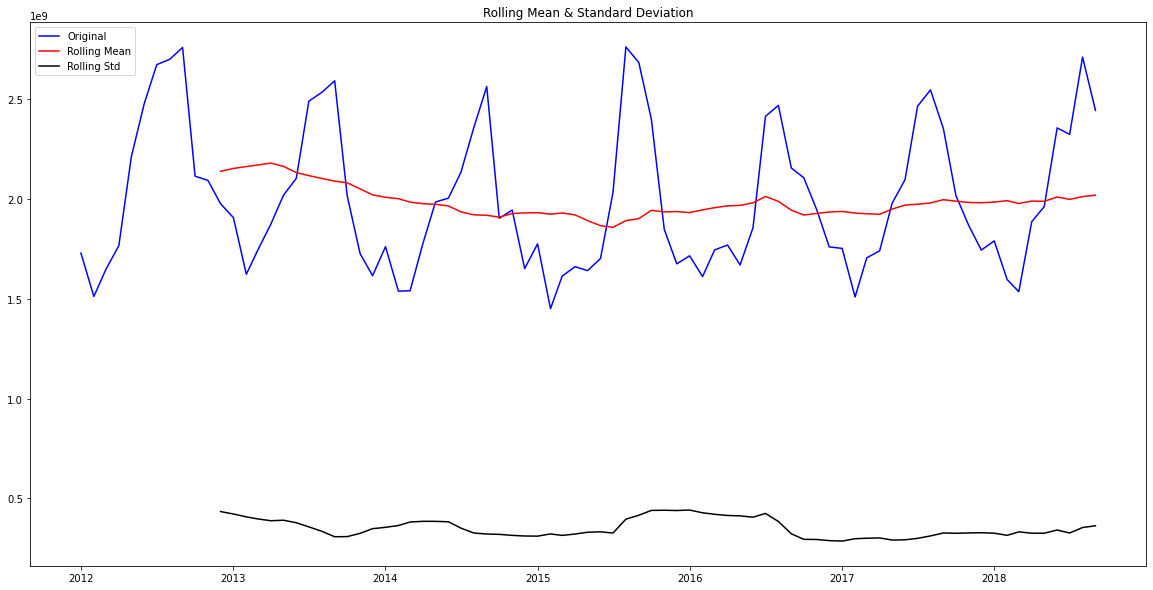

In [21]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(data, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [23]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic          -2.095007
p-value                  0.246527
Lags Used               11.000000
No. of Obs              69.000000
Critical Value (1%)     -3.528890
Critical Value (5%)     -2.904440
Critical Value (10%)    -2.589656
dtype: float64


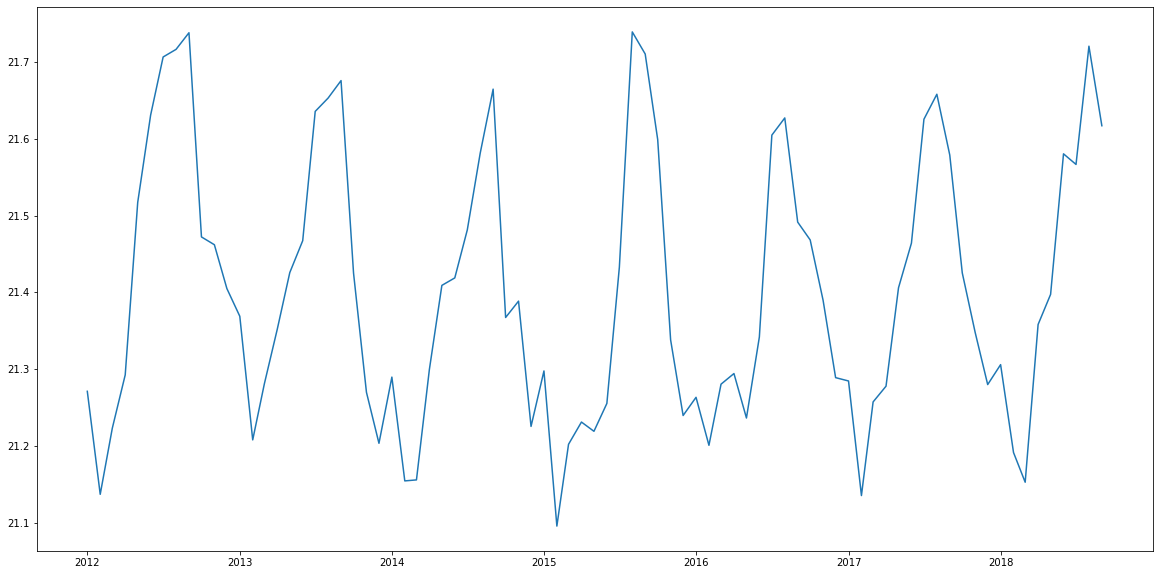

In [24]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

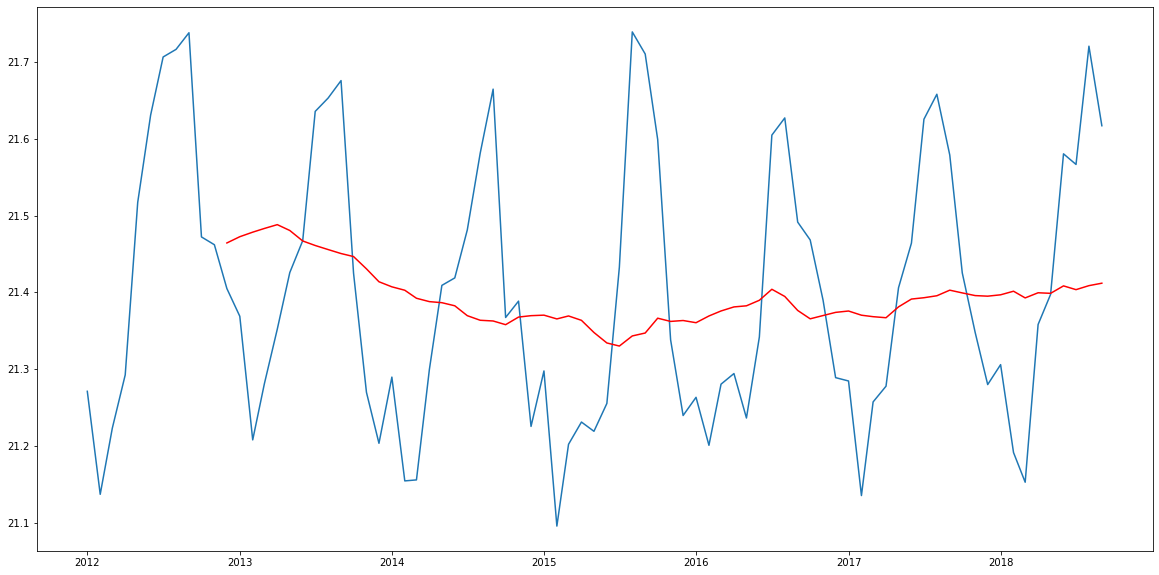

In [25]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [26]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-12-01,-0.059425
2013-01-01,-0.103688
2013-02-01,-0.270717
2013-03-01,-0.202372
2013-04-01,-0.136159


In [30]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

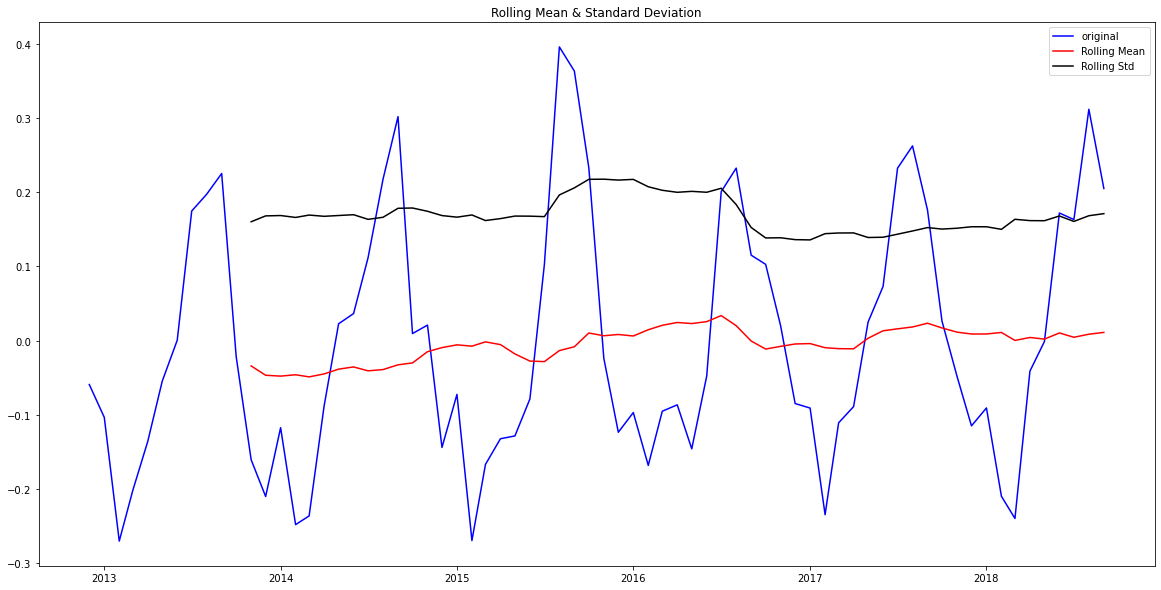

Dickey-Fuller Test: 
Test Statistic          -1.765561
p-value                  0.397689
Lags Used               11.000000
No. of Obs              58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64


In [31]:
stationarity(data_log_diff)

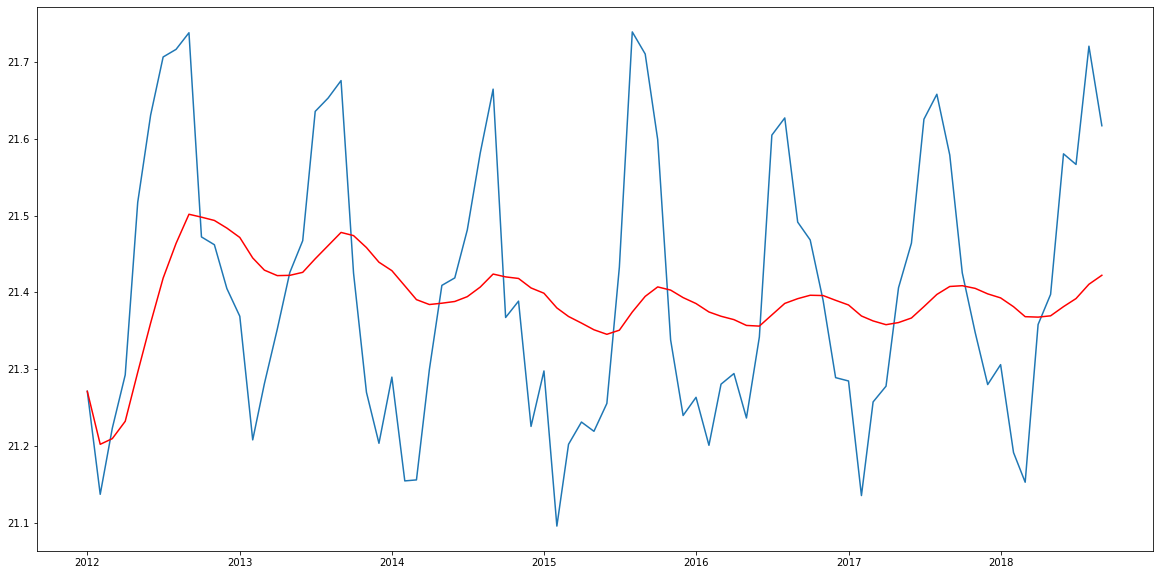

In [32]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

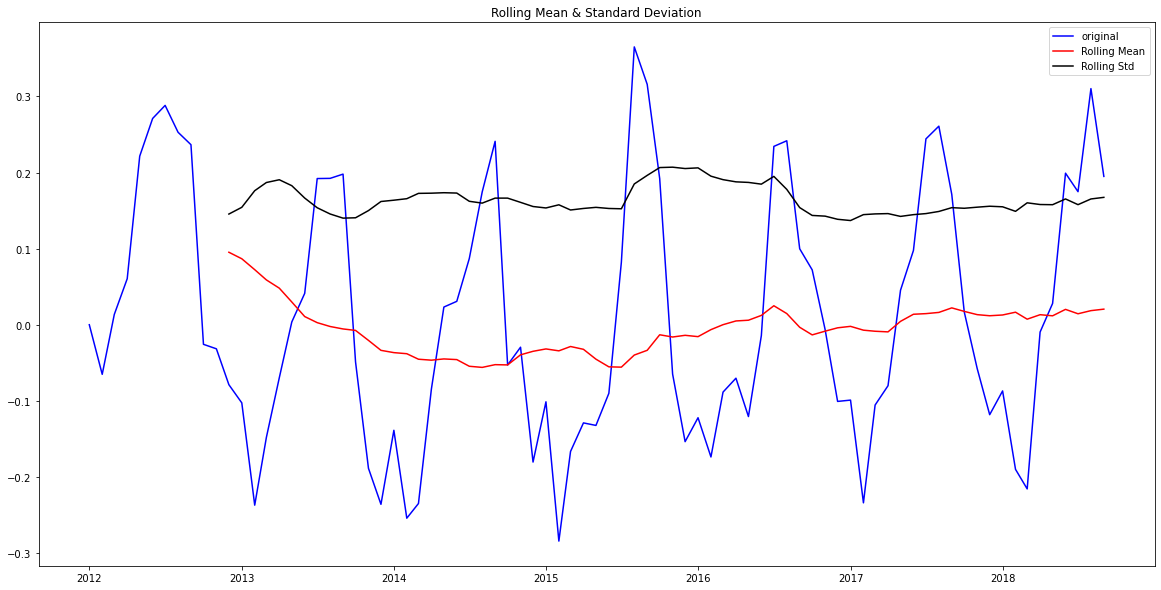

Dickey-Fuller Test: 
Test Statistic          -2.508577
p-value                  0.113401
Lags Used               12.000000
No. of Obs              68.000000
Critical Value (1%)     -3.530399
Critical Value (5%)     -2.905087
Critical Value (10%)    -2.590001
dtype: float64


In [34]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

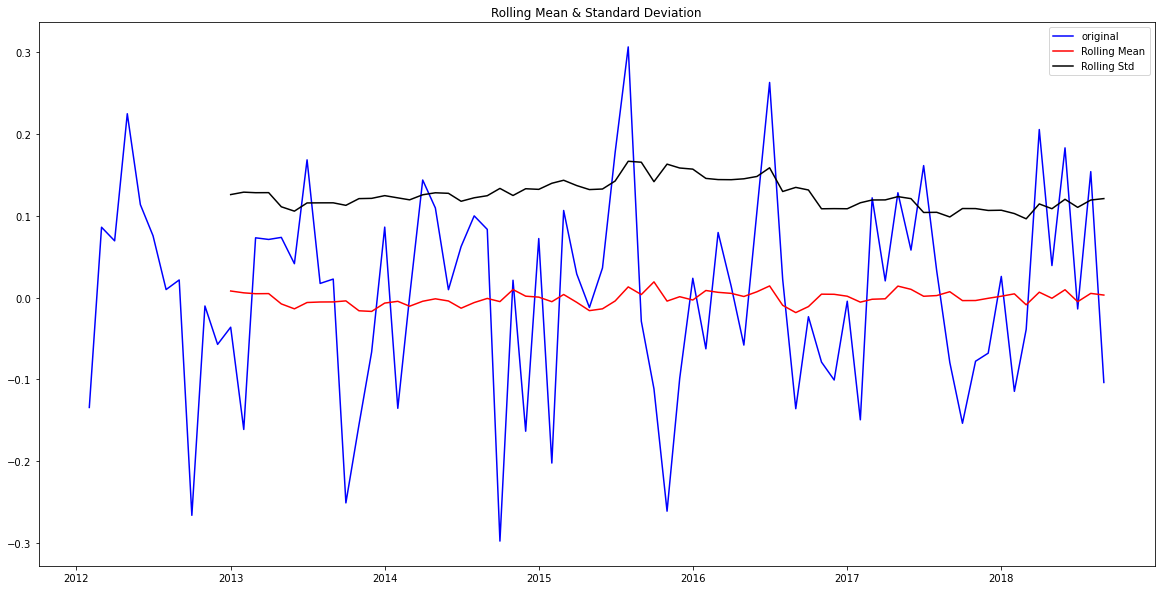

Dickey-Fuller Test: 
Test Statistic         -8.119349e+00
p-value                 1.167421e-12
Lags Used               1.000000e+01
No. of Obs              6.900000e+01
Critical Value (1%)    -3.528890e+00
Critical Value (5%)    -2.904440e+00
Critical Value (10%)   -2.589656e+00
dtype: float64


In [35]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

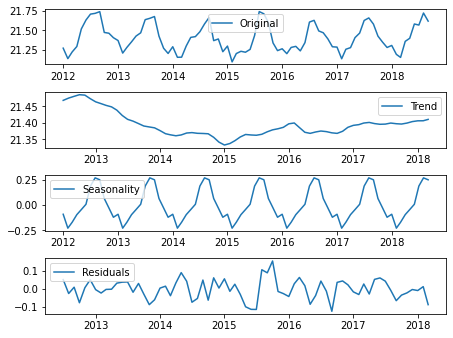

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [1]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

NameError: name 'residual' is not defined

C:\Users\Piyush\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

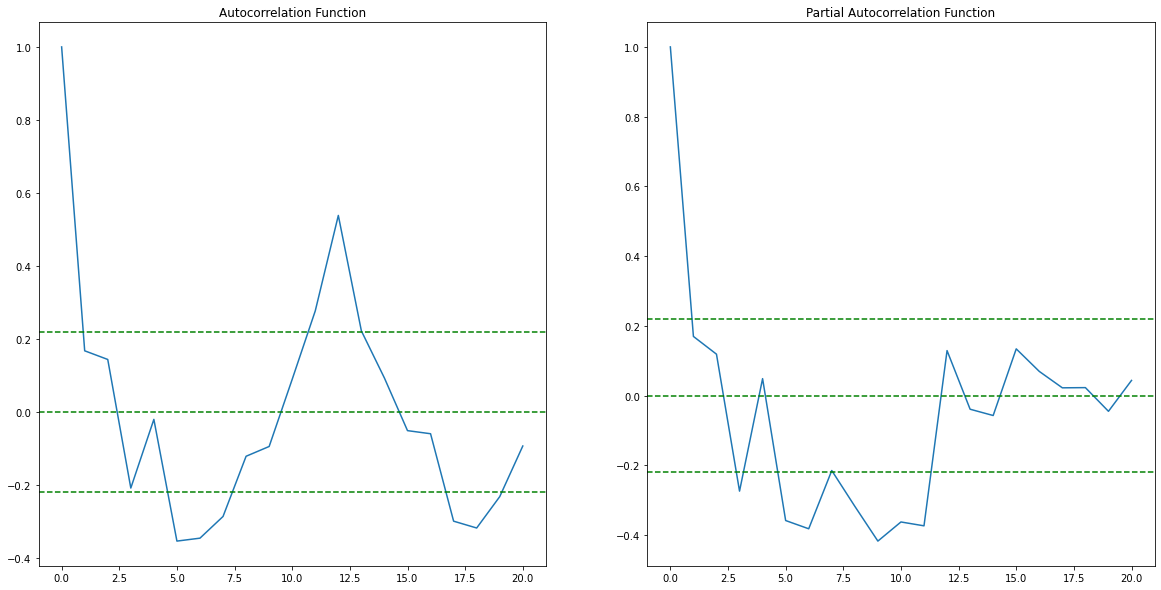

In [46]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\Piyush\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Piyush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

plotting ARIMA model


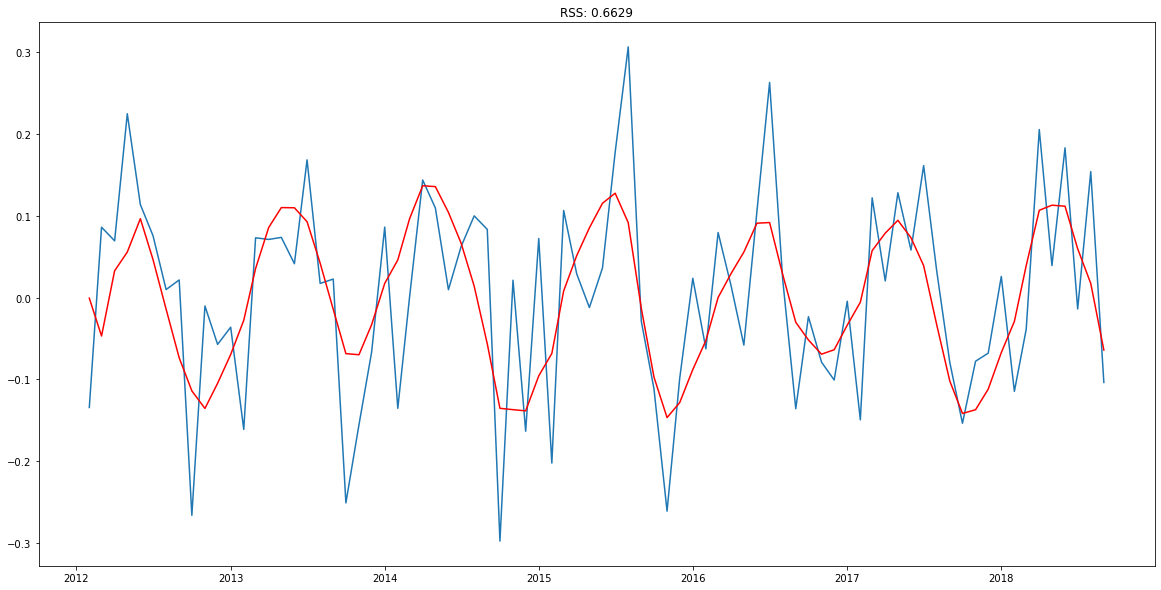

In [39]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

In [47]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-02-01    0.003688
2012-03-01   -0.019299
2012-04-01   -0.000612
2012-05-01    0.023156
2012-06-01    0.044000
dtype: float64


In [49]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-02-01    0.003688
2012-03-01   -0.015611
2012-04-01   -0.016223
2012-05-01    0.006933
2012-06-01    0.050933
dtype: float64


In [52]:
predictions_log=pd.Series(data_log['total gallons'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

AttributeError: 'Series' object has no attribute 'ix'

In [53]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

NameError: name 'predictions_log' is not defined

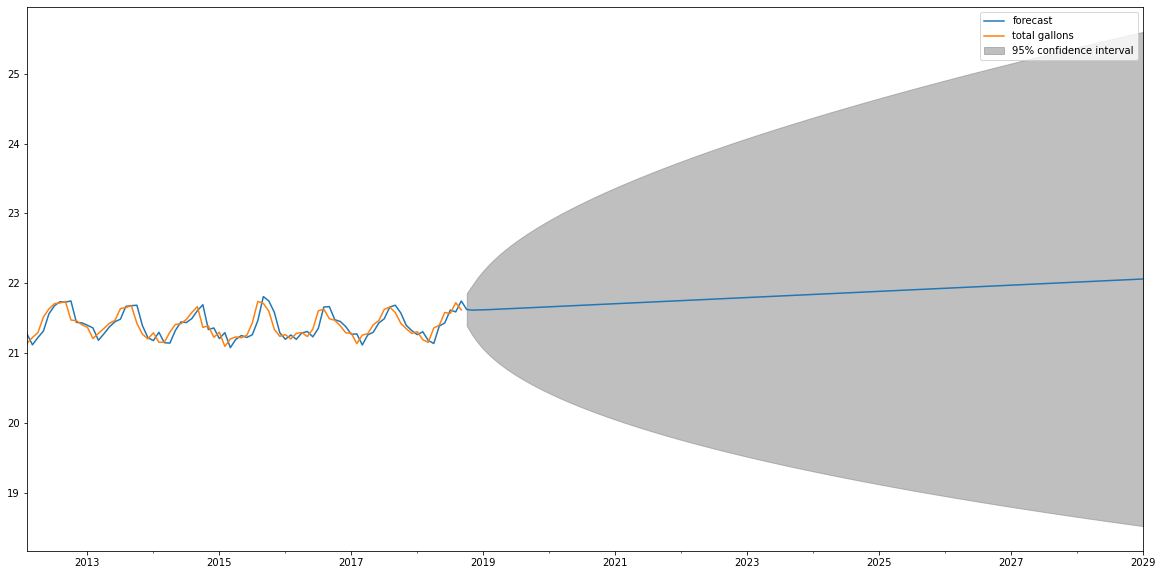

In [54]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)